# Display SST Data 
Source (partly): https://towardsdatascience.com/handling-netcdf-files-using-xarray-for-absolute-beginners-111a8ab4463f

In [301]:
'''packages'''
import xarray as xr
import matplotlib.pyplot as plt
import shutil
import urllib.request as request
from contextlib import closing
import netCDF4 as nc4
import cartopy.crs as ccrs #Kann nur mit conda installiert werden
from ftplib import FTP 
from datetime import datetime

In [239]:
def download_file (year, timeframe):
    '''
    Downloads the according file by given year from ftp server
    
    Parameters:
        year (int): The given year
        timeframe (int): The timeframe that has to be calculated
    
    '''
    
    '''connect to FTP server'''
    start = datetime.now()
    ftp = FTP('ftp.cdc.noaa.gov')
    ftp.login()
    '''change path'''
    ftp.cwd('/Projects/Datasets/noaa.oisst.v2.highres/')

    '''List All Files'''
    files = ftp.nlst()
    '''initialize counter'''
    counter = 0
   
    '''Find files according to given year'''
    for file in files:
        
        if file == 'sst.day.mean.'+ str(year)+'.nc':
            print("Downloading..." + file)
            '''Insert other path here'''
            ftp.retrbinary("RETR " + file ,open('C:/Users/User/Desktop/Geosoft2/NetCDF/' + file, 'wb').write)      
            ftp.close()
            end = datetime.now()
            diff = end - start
            print('All files downloaded for ' + str(diff.seconds) + 's')
            '''Call SST Function again'''
            sst(year, timeframe)
        else: counter+=1
    
    if counter == len(files):
        print('No matching dataset found for this year')

    


In [304]:
def compute_monthly_mean(year, month, DS):
    '''
    Computes the mean of SST by a given year and month
    
    Parameters:
        year (int): Given year
        month (int): Given month
        DS (xarray DataSet): The Dataset for the given year
    '''
    
    
    if month == 1:
        DS_month= DS.sel(time=slice(str(year)+'-01-01', str(year)+'-01-31'))
        visualize(DS_month, 'January '+str(year))
    elif month == 2:
        DS_month= DS.sel(time=slice(str(year)+'-02-01', str(year)+'-02-28'))
        visualize(DS_month, 'February '+str(year))
    elif month == 3:
        DS_month= DS.sel(time=slice(str(year)+'-03-01', str(year)+'-03-31'))
        visualize(DS_month, 'March '+str(year))
    elif month == 4:
        DS_month= DS.sel(time=slice(str(year)+'-04-01', str(year)+'-04-30'))
        visualize(DS_month, 'April '+str(year))
    elif month == 5:
        DS_month= DS.sel(time=slice(str(year)+'-05-01', str(year)+'-05-31'))
        visualize(DS_month, 'May '+str(year))
    elif month == 6:
        DS_month= DS.sel(time=slice(str(year)+'-06-01', str(year)+'-06-30'))
        visualize(DS_month, 'June '+str(year))
    elif month == 7:
        DS_month= DS.sel(time=slice(str(year)+'-07-01', str(year)+'-07-31'))
        visualize(DS_month, 'July '+str(year))
    elif month == 8:
        DS_month= DS.sel(time=slice(str(year)+'-08-01', str(year)+'-08-31'))
        visualize(DS_month, 'August '+str(year))
    elif month == 9:
        DS_month= DS.sel(time=slice(str(year)+'-09-01', str(year)+'-09-30'))
        visualize(DS_month, 'September '+str(year))
    elif month == 10:
        DS_month= DS.sel(time=slice(str(year)+'-10-01', str(year)+'-10-31'))
        visualize_month(DS_month, 'Ocotober '+str(year))
    elif month == 11:
        DS_month= DS.sel(time=slice(str(year)+'-11-01', str(year)+'-11-30'))
        visualize(DS_month, 'November '+str(year))
    elif month == 12:
        DS_month= DS.sel(time=slice(str(year)+'-12-01', str(year)+'-12-31'))
        visualize(DS_month, 'December '+str(year))
    else:
        print('month not valid')


In [305]:
def visualize(DS, title):
    '''
    Visualizes the SST Values for given timeframe
    
    Parameters:
        DS (xarray DataSet): The Dataset for the given timeframe
        title (String): Title of plot
    '''
    
    '''calculate mean by attribute time'''
    new = DS.mean('time')
    '''convert to xarray DataArray'''
    da = new.sst
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines() 
    da.plot()
    plt.title(title)
    plt.show() 

In [306]:
def sst(year, timeframe):
    '''
    Takes the arguments for calculating the SST 
    
        Parameters: 
            year (int): Given year
            timeframe (int): given timeframe, 0 = yearly mean, 1-12 = monthly mean
    
    '''
    '''Path to NetCDF File'''
    path ="C:/Users/User/Desktop/Geosoft2/NetCDF"
    '''Initialize empty list'''
    filelist = []
    '''Put all existing filenames into empty list'''
    for root, dirs, files in os.walk(path):
        for file in files:
            filelist.append(os.path.join(root,file))
    
    newname= 'C:/Users/User/Desktop/Geosoft2/NetCDF\sst.day.mean.'+str(year)+'.nc'
    
    '''if the needed file is already within the existing files'''
    if newname in filelist : 
        '''open existing NetCDF file as xarray DataSet'''
        dataDIR = r'C:\Users\User\Desktop\Geosoft2\NetCDF\sst.day.mean.'+str(year)+'.nc'
        DS = xr.open_dataset(dataDIR)
        '''yearly mean'''
        if timeframe == 0:
                visualize(DS, str(year))
        '''monthly mean'''
        elif 0 < timeframe < 13 :
                compute_monthly_mean(year, timeframe, DS)
        else: print("Month out of range")
    '''if file does not exist, download it first from FTP server'''
    else: 
          download_file(year, timeframe)

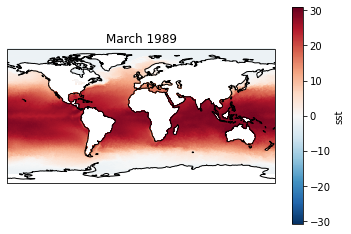

In [310]:
#test
sst(1989,3)